# Практическая работа №3: Статистический анализ социальных сетей.

Выполнила студентка гр. 0382 Чегодаева Елизавета. Вариант №48

## Цель работы
Овладеть навыками работы с математическими пакетами для статистического анализа социальных сетей.


## Основные теоретические положения

**Диада** - пара акторов и возможная связь между ними.

**Цензус диад** - тройка чисел: $<M, A, N>$ - где: $M$ - количество взаимных диад, $A$ - количество асимметричных диад, $N$ - количество нулевых диад.<br>
* $M = \frac{1}{2} trace(𝐗𝐗)$
* $A = trace(𝐗𝐗^{T}) - 2M$
* $N = C_g^2 - A - M$

*Виды диад:*

* $D_{i,j} = (1, 1)$ - взаимная диада

* $D_{i,j} = (1, 0)$, $D_{i,j} = (0, 1)$ - ассиметричные диады

* $D_{i,j} = (0, 0)$ - нулевая диада


**Индекс Каца-Пауэлла** - характеристика измерения тенденции акторов

$-\infty <  \rho_{kp} \leq 1$, 

такое что $P(j \to i | i \to j) = P(j \to i) + \rho_{kp}P(j \not\to i)$

Индекс взаимности основан на ожидании количества взаимных диад, предполагая, что выбор делается акторами случайным образом.

*Оценки индекса Каца-Пауэлла:*
* Фиксированный выбор d: $\hat{\rho}_{kp}=\frac{2(g-1)M - gd^2}{gd(g - 1 - d)}$
* Свободный выбор: $\hat{\rho}_{kp}'=\frac{2(g-1)^2M - L^2 + L_2}{L(g - 1)^2 - L^2 + L_2}$, где: $L = \sum{x_{i+}}$, $L_2 = \sum{x^2_{i+}}$


**Индекс Бандиопадхьяйя** - основан на минимальном и максимальном значениях количества взаимных диад. Значение индекса: 

$\rho_{b} = \frac{M - M_{min}}{M_{max} - M_{min}}$, где

$M_{min} = \underset{0 \le t \le g}{max}\{\sum_{i=1}^tx_{i+} - t(g-1) - C_t^2\}$, $M_{max} = ⌊1/2\\{\sum_{i=1}^tx_{i+} - \underset{0 \le t \le g}{max}\{\sum_{i=1}^tx_{i+} - t(t-1) - \sum_{i=t+1}^g min(t, x_{i+})}⌋$



*Доверительный интервал для $P_0$:* 

$[\hat{P} - z_{\alpha/2}\sqrt{\hat{P}(1 - \hat{P})/g(g-1)}, \hat{P} + z_{\alpha/2}\sqrt{\hat{P}(1 - \hat{P})/g(g-1)}]$, 

где $\hat{P} = \frac{l}{g(g-1)}$.

## Постановка задачи
С помощью математических пакетов и соответствующих библиотек провести статистический анализ случайно смоделированного ориентированного графа. Полученные результаты содержательно проинтерпретировать.


## Выполнение работы
#*№0*
Для выполнения поствленных задач были установлены необходимые пакеты и подключены следующие библиотеки:


In [1]:
install.packages('igraph')
install.packages('statnet')
install.packages('network')
install.packages('intergraph')
install.packages('VGAM')
library(igraph)
library(statnet)
library(network)
library(intergraph)
library(VGAM)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘DEoptimR’, ‘robustbase’, ‘coda’, ‘trust’, ‘lpSolveAPI’, ‘rle’, ‘tergm’, ‘ergm.count’, ‘sna’, ‘tsna’, ‘ergm’, ‘network’, ‘networkDynamic’, ‘statnet.common’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union


Loading required package: tergm

Loading required package: ergm

Loading required package: network


‘network’ 1.18.0 (2022-10-05), part of the Statnet Project
* ‘news(package="network")’ for changes since last versi

Также инициализированы константы, согласно варианту:


> $g = 68$; $p = 0.60$; $P_0 = 0.61$;  $\alpha = 0.04$



In [2]:
g <- 68
p <- 0.6
P0 <- 0.61
alpha <- 0.04

#*№1*
С помощью библиотеки igraph смоделировать случайный орграф
$\mathcal{G_𝑑}$ на основе модели Эрдеша—Реньи: $\mathcal{G_𝑑}$ = $\mathcal{G}(𝑔, 𝑝)$ , где 𝑔 – количество акторов, 𝑝 – вероятность появления дуги между акторами. В R
для модели случайного графа Эрдеша—Реньи существует функция
erdos.renyi.game(). Ознакомьтесь с данной моделью и опишите
её.

В модели $\mathcal{G_𝑑}$ = $\mathcal{G}(𝑔, 𝑝)$ граф строится путём случайного добавления рёбер. Каждое ребро включается в граф с вероятностью p независимо от остальных рёбер. Эквивалентно, все графы с n узлами и M рёбрами имеют одинаковую вероятность:

$p^M(1-p)^{\begin{pmatrix}
n\\
2
\end{pmatrix}-M}$

In [3]:
graph <- erdos.renyi.game(g, p, directed=TRUE)
graph

IGRAPH 7ee5ed7 D--- 68 2737 -- Erdos-Renyi (gnp) graph
+ attr: name (g/c), type (g/c), loops (g/l), p (g/n)
+ edges from 7ee5ed7:
 [1]  1->68  3-> 1  4-> 1  5-> 1  7-> 1  9-> 1 10-> 1 11-> 1 13-> 1 14-> 1
[11] 15-> 1 18-> 1 21-> 1 22-> 1 24-> 1 26-> 1 27-> 1 28-> 1 30-> 1 33-> 1
[21] 34-> 1 35-> 1 37-> 1 39-> 1 42-> 1 44-> 1 46-> 1 47-> 1 49-> 1 50-> 1
[31] 51-> 1 52-> 1 54-> 1 56-> 1 58-> 1 59-> 1 62-> 1 64-> 1 65-> 1 68-> 1
[41]  1-> 2  2->68  3-> 2  4-> 2  5-> 2  6-> 2  7-> 2 10-> 2 13-> 2 14-> 2
[51] 15-> 2 17-> 2 18-> 2 19-> 2 22-> 2 25-> 2 26-> 2 28-> 2 29-> 2 31-> 2
[61] 32-> 2 33-> 2 35-> 2 36-> 2 37-> 2 39-> 2 41-> 2 42-> 2 43-> 2 44-> 2
[71] 46-> 2 51-> 2 55-> 2 56-> 2 60-> 2 62-> 2 64-> 2 66-> 2  1-> 3  7-> 3
+ ... omitted several edges

#*№2*
Отобразить полученный орграф.

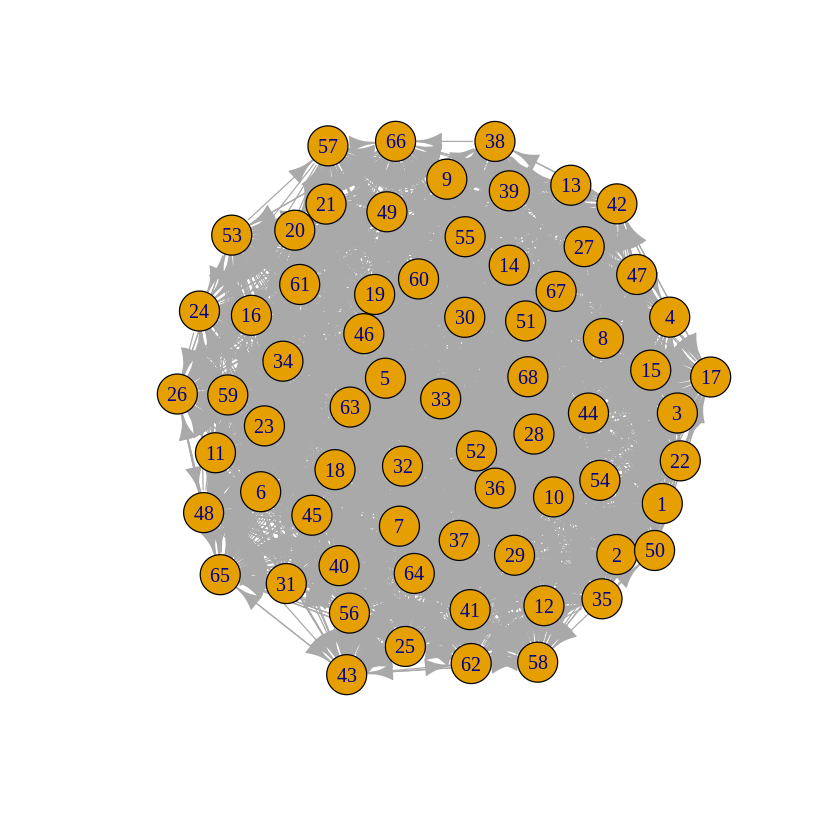

In [6]:
plot(graph, label=colnames(graph), layout=layout.fruchterman.reingold)

#*№3*
 
 Вычислить «пятичисловую сводку» для графа $\mathcal{G_𝑑}$.

In [9]:
cat("Размер:", length(V(graph)))

net = asNetwork(graph)
cat("\nПлотность:", gden(net))

cat("\nКомпоненты:", count_components(graph, mode = "strong"))

cat("\nДиаметр:", diameter(graph))

cat("\nКоэффициент кластеризации:", transitivity(graph))

Размер: 68
Плотность: 0.6007463
Компоненты: 1
Диаметр: 2
Коэффициент кластеризации: 0.840252

#*№4*
Вычислить цензус диад. Сделать выводы

In [11]:
cat("Цензус диад:\n")
census <- dyad_census(graph)
census

Цензус диад:


$mut
[1] 822

$asym
[1] 1093

$null
[1] 363

**Вывод:**

*   Число взаимных диад равно 822.
*   Число ассиметричных диад (однонаправленных отношений) равно 1093.
* Число нулевых диад - пар акторов, не имеющих связи, равно 363.







#*№5*

Вычислить оценку индекса взаимности Каца—Пауэла при фиксированом выборе акторов $𝑑$ и при свободном выборе. Сделать выводы.

In [27]:
d <- 30 # произвольное натуральное число
fix <- (2*census$mut*(g-1)-g*d*d)/(g*d*(g-1-d))
cat("Фиксированный выбор:", fix)

matr <- as.matrix(net)
L <- sum(rowSums(matr))
L2 <- sum(rowSums(matr)^2)

flex <- (2*(g-1)^2*census$mut-L^2+L2)/(L*(g-1)^2-L^2+L2)
cat("\nCвободный выбор :", flex)

Фиксированный выбор: 0.6484897
Cвободный выбор : -3.668634e-06

**Вывод:**

При свободном выборе акторы более склонны образовывать односторонние связи или не образовывать связи вовсе, чем при фиксированном выборе (30).



#*№6*

Вычислить вероятность того, что связь будет взаимной для каждого случая.

In [25]:
fix_p <- (d/(g-1))*((d/(g-1))+fix*(g-1-d)/(g-1))
cat("Фиксированный выбор:", fix_p)

flex_p <- (rowSums(matr)*colSums(matr))/(g - 1)^2
flex_p  <- sum(flex_p)/g
cat("\nCвободный выбор :", flex_p, "\n")

Фиксированный выбор: 0.3608428
Cвободный выбор : 0.3605152 


#*№7*
Вычислить индекс взаимности Бандиопадхьяйя. Сделать выводы.

In [30]:
vec1 <- c()
vec2 <- c()
for(t in 0:g){
    sum <- 0
    if (t>0){
        for(i in 1:t) {
            sum <- sum+sum(matr[i, ])
        }
    }
    f_t <- sum-t*(g-1)-choose(t, 2)
    vec1 <- append(vec1, f_t)
    sum2 <- 0
    if (t + 1 <= g){
        for(i in (t+1):g){
            sum2 <-sum2+min(t,sum(matr[i, ]))
        }
    }
    gt <-sum-t*(t-1)-sum2
    vec2<-append(vec2, gt)
}
Mmin <- max(v_1)
Mmax <- floor(0.5*(sum(matr)-max(v_2)))
P_B <- (census$mut - Mmin)/(Mmax - Mmin)
cat("Индекс взаимности Бандиопадхьяйя:", P_B)


Индекс взаимности Бандиопадхьяйя: 0.6008772

**Вывод:**

Акторы в полученной сети склонны к образованию взаимных связей.

#*№8*

Проверить нулевую гипотезу о том, что число дуг $𝐿$ в орграфе $\mathcal{G_𝑑}$ имеет биномиальное распределение $𝐿 ∼ Bin(𝑔(𝑔 − 1), 1/2)$ при уровне значимости $𝛼$. Определить максимальный уровень значимости при котором нулевая гипотеза не отвергается.


> Mаксимальный уровень значимости при котором нулевая гипотеза не отвергается = p-value




In [32]:
L <- length(E(graph))
binom.test(L, g*(g-1), 0.5)


	Exact binomial test

data:  L and g * (g - 1)
number of successes = 2737, number of trials = 4556, p-value < 2.2e-16
alternative hypothesis: true probability of success is not equal to 0.5
95 percent confidence interval:
 0.5863548 0.6150085
sample estimates:
probability of success 
             0.6007463 


Полученное $p-value < 2.2e-16$ очень мало в сравнении с $\alpha = 0.04$, из чего следует, что нулевая гипотеза отвергается. 

#*№9*
Проверить нулевую гипотезу о том, что число дуг $𝐿$ в орграфе $\mathcal{G_𝑑}$ имеет биномиальное распределение $𝐿 ∼ Bin(𝑔(𝑔−1), 𝑃_0)$ при уровне
значимости $𝛼$. Определить максимальный уровень значимости при
котором нулевая гипотеза не отвергается.

In [48]:
binom.test(L, g*(g-1), P0)


	Exact binomial test

data:  L and g * (g - 1)
number of successes = 2737, number of trials = 4556, p-value = 0.2021
alternative hypothesis: true probability of success is not equal to 0.61
95 percent confidence interval:
 0.5863548 0.6150085
sample estimates:
probability of success 
             0.6007463 


Полученное $p-value = 0.2021$ превышает $\alpha = 0.04$, следовательно, нулевая гипотеза - принимается. 

#*№10*

Построить доверительный интервал для оценки параметра $𝑝$ с доверительной надёжностью $(1 − 𝛼)$. Сделать выводы.

In [47]:
p_grade <- L/(g*(g-1))
cat("Оценка: ", p_grade)

z_a <- abs(qnorm(alpha/2))
P_lower <- p_grade - z_a*sqrt(p_grade*(1-p_grade)/(g*(g-1)))
P_upper <- p_grade + z_a*sqrt(p_grade*(1-p_grade)/(g*(g-1)))
cat("\nДИ: [",P_lower,", ",P_upper,"]")

Оценка:  0.6007463
ДИ: [ 0.5858449 ,  0.6156476 ]

**Вывод:**
Заданное $p=0.60$ входит в найденный ДИ, исходя из чего - оценка верна.



## Выводы
В ходе работы был случайно сгенерирован ориентированный граф и вычислена «пятичисловая сводка» для этого графа. Также вычислен цензус диад, индекс Каца-Пауэла и индекс взаимности Бандиопадхьяйя - на основе которых граф был проанализирован. Были проверены гипотезы о распределении числа дуг в графе и найден доверительный интервал для параметра p.